In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
movies_path = os.path.join(os.curdir, 'ml-20m')

### Loading the files into three distincs dataframes

In [3]:
ratings = pd.read_csv(movies_path+'/ratings.csv')
movies = pd.read_csv(movies_path+'/movies.csv')
tags = pd.read_csv(movies_path+'/tags.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Exploratory analysis

### Top contributors have thousands of ratings

In [6]:
ratings.groupby('userId',as_index=False).rating.count().sort_values('rating',ascending=False)

,userId,rating
118204,118205,9254
8404,8405,7515
82417,82418,5646
121534,121535,5520
125793,125794,5491
74141,74142,5447
34575,34576,5356
131903,131904,5330
83089,83090,5169
59476,59477,4988


Minimum amount of ratings per user is 20, so this may have been a requirement for a user's ratings to be included in the dataset.

### We are calculating the mean rating for every film

In [7]:
# group movies, aggregate by avg rating
rat = ratings.groupby('movieId',as_index=False).rating.mean()

In [8]:
rat.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


### Extracting the year from title:

In [9]:
import re
def extract_year(title):
    pattern = '\((\d+)\)'
    m = re.findall(pattern,title)
    try:
        return int(m[-1])
    except:
        return None

# test
# print(extract_year('Babe Ruth Story, The (1948) 	'))

We are creating a column containing the year the movie has been launched by applying the extract_year function

In [10]:
movies['year'] = movies.title.apply(extract_year)

We still have some movies without a year

In [11]:
movies[movies.year.isnull()]

,movieId,title,genres,year
10593,40697,Babylon 5,Sci-Fi,NaN
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
22368,107434,Diplomatic Immunity (2009– ),Comedy,NaN
22669,108548,"Big Bang Theory, The (2007-)",Comedy,NaN
22679,108583,Fawlty Towers (1975-1979),Comedy,NaN
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,NaN
23824,113190,Slaying the Badger,Documentary,NaN
24286,115133,Tatort: Im Schmerz geboren,Crime,NaN
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,NaN


We can manually fill in the year for some of the movies

In [12]:
#movies.loc[movies.movieId==107434]['year']# = 2009
#movies.iloc[22679,3] = 1975

... and then drop the remaining ones

In [13]:
# drop movies without a year
movies = movies.dropna()

## Assumption 1: There is a correlation between the year of the movie and the average rating

In [14]:
movies_rated = movies.merge(rat, on='movieId', how='inner')

In [15]:
movies_rated['year'] = movies_rated['year'].astype(int)

In [16]:
movies_rated.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


Creating a dataframe with average ratings per year. I have also included the number of movies rated per year, because I intend to exclude from the analysis years with less that 50 movies rated

In [17]:
by_year = movies_rated.groupby('year',as_index=False).agg({'rating':'mean','title':'count'})

In [18]:
by_year.head()

,year,rating,title
0,1891,3.000000,1
1,1893,3.375000,1
2,1894,3.071429,2
3,1895,3.125000,2
4,1896,3.183036,2


In [19]:
by_year[by_year.title<50]

,year,rating,title
0,1891,3.000000,1
1,1893,3.375000,1
2,1894,3.071429,2
3,1895,3.125000,2
4,1896,3.183036,2
5,1898,3.850000,5
6,1899,3.625000,1
7,1900,3.166667,1
8,1901,5.000000,1
9,1902,3.738189,1


I am expluding years with less than 50 movies rated by setting the xlim option on the graph to the min value of 1930

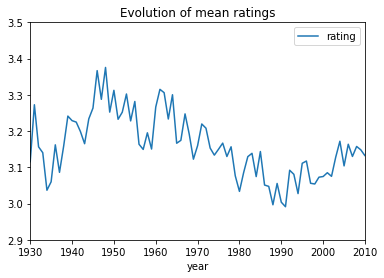

In [20]:
by_year.plot(kind='line', title='Evolution of mean ratings', x='year', y='rating', xlim = [1930,2010], ylim = [2.9,3.5])

In [21]:
# is there a correlation between a year and the average ratings - in other words are the values
# for years and average ratings correlated?

np.corrcoef(by_year.year,by_year.rating)

array([[ 1.        , -0.35009043],
       [-0.35009043,  1.        ]])

The corrcoef function shows a weak inverse corelation. It may be an interesting feature to explore further, but only on the basis of more information regarding when actually the ratings have been done - it might be the result of the preference of certains generations

In [22]:
ratings['date'] = pd.to_datetime(ratings.timestamp, unit='s')

In [23]:
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


exploring min and max of the ratings frame

In [24]:
print(ratings.date.min())
print(ratings.date.max())

1995-01-09 11:46:44
2015-03-31 06:40:02


Let's split the ratings in two: all ratings between 1995 and 2005 and the rest, roughly ten years per split - split ratings: 'old' and 'new'. We'll then merge the two with the movies data_frame and try to determenine if the two graphs are significantly different

In [42]:
ra_old = ratings[ratings.date<'2005-12-31']

In [43]:
ra_old.shape

(11835132, 5)

In [44]:
ra_new = ratings[ratings.date>'2005-12-31']

In [45]:
ra_new.shape

(8165131, 5)

In [46]:
ra_old.shape[0] + ra_new.shape[0] == ratings.shape[0]

True

Merging with movies dataframe

In [47]:
mov_old_rat = movies.merge(ra_old, on='movieId', how='inner')

In [48]:
mov_old_rat.head()

,movieId,title,genres,year,userId,rating,timestamp,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3,4.0,944919407,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,6,5.0,858275452,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,8,4.0,833981871,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,10,4.0,943497887,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,12,4.0,859063718,1997-03-22 20:48:38


In [49]:
mov_new_rat = movies.merge(ra_new, on='movieId', how='inner')

Creating year averages:

In [50]:
by_year_old = mov_old_rat.groupby('year',as_index=False).agg({'rating':'mean','title':'count'})

In [52]:
by_year_new = mov_new_rat.groupby('year',as_index=False).agg({'rating':'mean','title':'count'})

Plotting the two graphs:


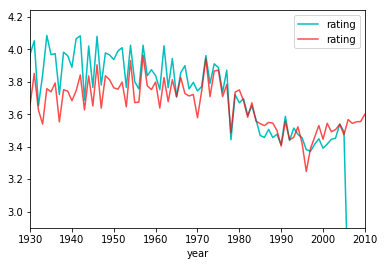

In [62]:
#f, axarr = plt.subplots(1, 2, sharex=True)
ax = by_year_old.plot(kind='line',x='year',y='rating', color='c', xlim=[1930,2010], ylim=[2.9, 4.24])
by_year_new.plot(ax=ax, kind='line', x='year', y='rating', color='r', alpha=.7)

In [25]:
horror = movies_rated[movies_rated.genres.str.contains('Horror')]

In [26]:
horror.rating.mean()

2.6967957652813723

In [27]:
movies_rated.genres.value_counts()

Drama                                              4416
Comedy                                             2248
Documentary                                        1876
Comedy|Drama                                       1241
Drama|Romance                                      1043
Comedy|Romance                                      741
Comedy|Drama|Romance                                594
Horror                                              556
Crime|Drama                                         435
Drama|Thriller                                      421
Drama|War                                           394
Horror|Thriller                                     372
Crime|Drama|Thriller                                299
Thriller                                            264
(no genres listed)                                  233
Western                                             207
Action|Drama                                        204
Comedy|Crime                                    

In [28]:
scifi = movies_rated[movies_rated.genres.str.contains('Sci-Fi')]

In [29]:
scifi.rating.mean()

2.8895105543669826

In [30]:
pure_scifi = movies_rated[movies_rated.genres == 'Sci-Fi']

In [31]:
pure_scifi.rating.mean()

2.788717140800562

In [32]:
pure_drama = movies_rated[movies_rated.genres == 'Drama']

In [33]:
pure_drama.shape

(4416, 5)

In [34]:
pure_drama.rating.mean()

3.298640318278076

In [35]:
drama = movies_rated[movies_rated.genres.str.contains('Drama')]

In [36]:
drama.rating.mean()

3.262056796300688

In [37]:
movies_rated.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


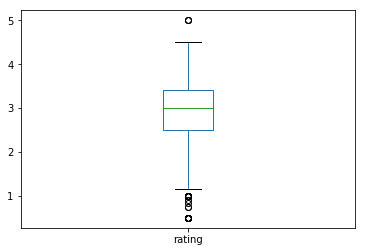

In [38]:
scifi.rating.plot(kind='box')

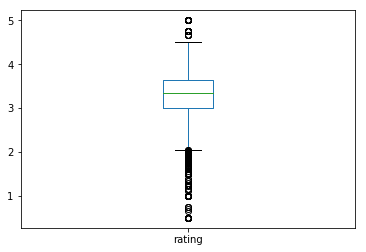

In [39]:
drama.rating.plot(kind='box')